In [ ]:
# PART 2 - DATASET FOR ANALYSIS: 

In [ ]:
# 1. Import necessary packages and libraries: 
import pandas as pd
import numpy as np 
from sklearn import linear_model as lm                                                                       # For Linear Regression 
from sklearn.model_selection import train_test_split                                                         # For splitting the heart_disease_data into testing and training sets
from sklearn.linear_model import LinearRegression                                                            # For Linear Regression 
from sklearn.linear_model import LogisticRegression                                                          # For Logistic Regression
from sklearn.metrics import accuracy_score, confusion_matrix                                                 # For Logistic Regression
from sklearn.metrics import f1_score, roc_curve, auc, precision_recall_curve, average_precision_score        # For Logistic Regression
from sklearn.metrics import r2_score, root_mean_squared_error                                                # For Linear Regression 
from sklearn.datasets import fetch_openml                                                                    # For loading the dataset (used Pandas instead)
from sklearn.linear_model import ElasticNet                                                                  # For ElasticNet Regression 
from sklearn.preprocessing import StandardScaler                                                             # For standardizing the data 
from sklearn.neighbors import KNeighborsClassifier                                                           # For k-NN classification
import seaborn as sns                                                                                        # For data visualization 
import matplotlib.pyplot as plt                                                                              # For data visualization (Seaborn is created after Matplotlib)

In [9]:
# 2. Load the dataset: 
heart_disease_data = pd.read_csv('C:/Users/Zahin/Desktop/Semester 2/Machine Learning and AI/Assignment 2/heart_disease_uci.csv')
heart_disease_data.head()
heart_disease_data.info()
heart_disease_data.describe()
print(heart_disease_data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 107.9+ KB
Index(['age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [36]:
# 3. Preprocess the data: 
heart_disease_data['chol'] = heart_disease_data['chol'].replace(0, np.nan)           # Realistically, cholesterol levels cannot be 0; hence, they should be replaced with NaN, 
                                                                                     # followed by fillna with the column's mean. 

heart_data_cleaned = heart_disease_data.fillna(heart_disease_data.mean(numeric_only=True)) # Fill NaN values with the mean from each column.
print(heart_data_cleaned)

     age     sex        dataset               cp    trestbps   chol    fbs  \
0     63    Male      Cleveland   typical angina  145.000000  233.0   True   
1     67    Male      Cleveland     asymptomatic  160.000000  286.0  False   
2     67    Male      Cleveland     asymptomatic  120.000000  229.0  False   
3     37    Male      Cleveland      non-anginal  130.000000  250.0  False   
4     41  Female      Cleveland  atypical angina  130.000000  204.0  False   
..   ...     ...            ...              ...         ...    ...    ...   
915   54  Female  VA Long Beach     asymptomatic  127.000000  333.0   True   
916   62    Male  VA Long Beach   typical angina  132.132404  139.0  False   
917   55    Male  VA Long Beach     asymptomatic  122.000000  223.0   True   
918   58    Male  VA Long Beach     asymptomatic  132.132404  385.0   True   
919   62    Male  VA Long Beach  atypical angina  120.000000  254.0  False   

              restecg      thalch  exang   oldpeak        slope

In [ ]:
# PART 3 - BUILD AND EVALUATE MODELS (1. REGRESSION MODELS):  

In [ ]:
# 4. Train the linear regression model:
y = heart_data_cleaned['chol']                                                  # The 'chol' column is my target column
X = pd.get_dummies(heart_data_cleaned.drop(columns=['num', 'chol']), dtype=int) # One-hot encoding: converted floats to binary values (0 and 1). 
                                                                                # Excluded the 'num' (for classification) and 'chol' (regression target) columns from the dataset


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=150)  

# 4.1. Fill NaN values with the mean for all train and test sets: 
X_train_cleaned = X_train.fillna(X_train.mean(numeric_only=True))                # I initially saw NaN values for both X and y; hence, I used fillna and their respective means
X_test_cleaned = X_test.fillna(X_train.mean(numeric_only=True))  
y_train_cleaned = y_train.fillna(y_train.mean(numeric_only=True))
y_test_cleaned = y_test.fillna(y_train.mean(numeric_only=True))

# 4.2. Standardization of the data: 
from sklearn.preprocessing import StandardScaler                                  # For standardizing the data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_cleaned)
X_test_scaled = scaler.transform(X_test_cleaned)

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=150)
elastic_net.fit(X_train_scaled, y_train_cleaned)

# 5. Predict and evaluate the model:
y_pred = elastic_net.predict(X_test_scaled)
print("R^2 Score:", r2_score(y_test_cleaned, y_pred))
print("Root Mean Squared Error (RMSE):", root_mean_squared_error(y_test_cleaned, y_pred))

R^2 Score: 0.017368630492873405
Root Mean Squared Error (RMSE): 57.23828299673242


In [ ]:
import seaborn
seaborn.heatmap?

Signature:
seaborn.heatmap(
    data,
    *,
    vmin=None,
    vmax=None,
    cmap=None,
    center=None,
    robust=False,
    annot=None,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels='auto',
    yticklabels='auto',
    mask=None,
    ax=None,
    **kwargs,
)
Docstring:
Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the
currently-active Axes if none is provided to the ``ax`` argument.  Part of
this Axes space will be taken and used to plot a colormap, unless ``cbar``
is False or a separate Axes is provided to ``cbar_ax``.

Parameters
----------
data : rectangular dataset
    2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
    is provided, the index/column information will be used to label the
    columns and rows.
vmin, vmax : floats, optional
    Values to anchor the colormap, other

c:\Users\Zahin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.919e+05, tolerance: 1.843e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Zahin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.952e+05, tolerance: 1.843e+02 Linear regression models with null weight for the l1 regularization term are more efficiently 

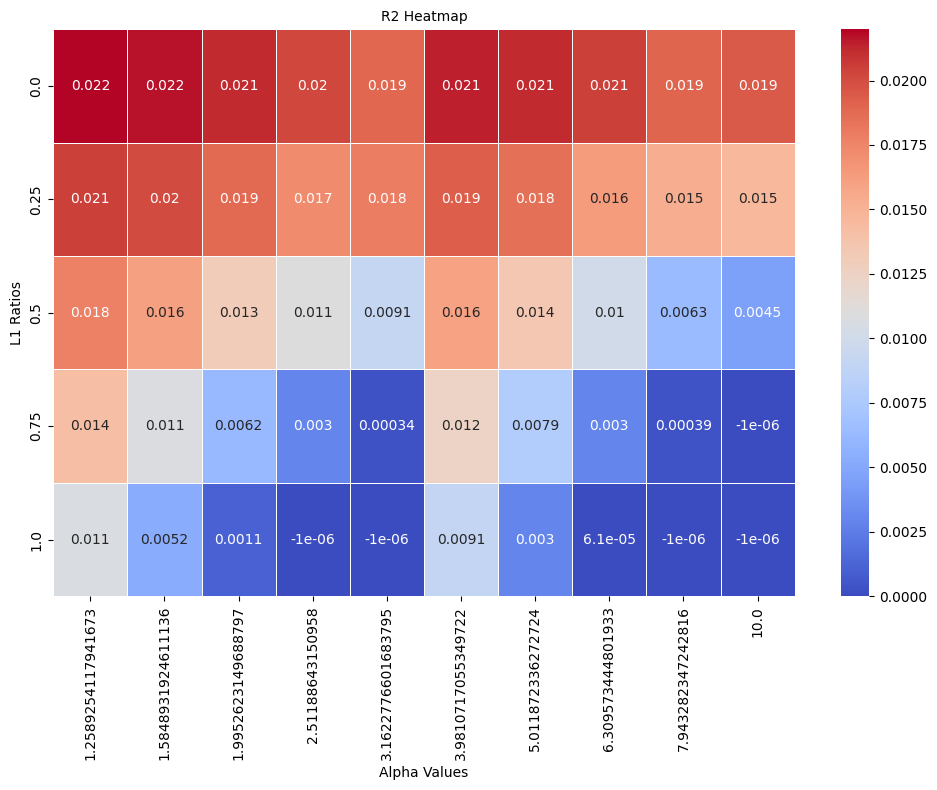

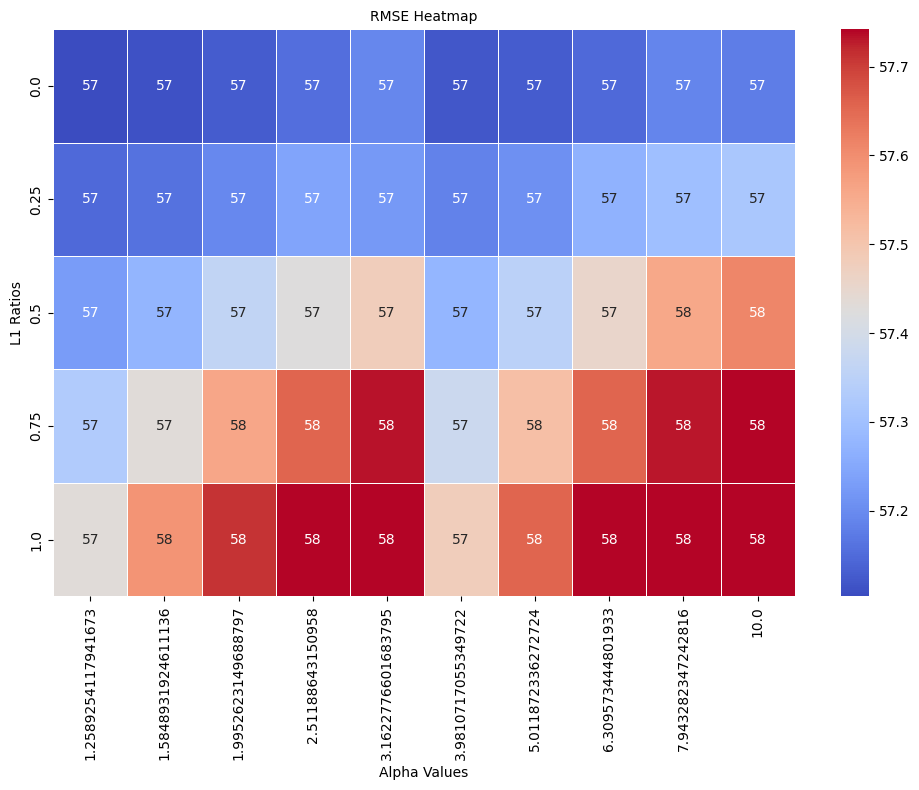

R2 Score Range from Heatmap: -1.0248226818276862e-06 to 0.02198561836760826
RMSE Range from Heatmap: 57.10365488445902 to 57.74195818305316
[[ 2.19856184e-02  2.17033762e-02  2.11871796e-02  2.02451889e-02
   1.89765582e-02  2.14389184e-02  2.11323029e-02  2.05243533e-02
   1.90575557e-02  1.94292279e-02]
 [ 2.05114170e-02  2.00585831e-02  1.88754265e-02  1.71994874e-02
   1.79058765e-02  1.92461340e-02  1.84791982e-02  1.63395434e-02
   1.53187989e-02  1.46558366e-02]
 [ 1.77151504e-02  1.61158849e-02  1.30968106e-02  1.09993471e-02
   9.12023650e-03  1.60072830e-02  1.35151216e-02  9.98338348e-03
   6.31463369e-03  4.48575473e-03]
 [ 1.42149400e-02  1.07619532e-02  6.23791213e-03  2.97968299e-03
   3.35322350e-04  1.24229240e-02  7.88120848e-03  2.95776084e-03
   3.85824547e-04 -1.02482268e-06]
 [ 1.07008468e-02  5.24570967e-03  1.10707079e-03 -1.02482268e-06
  -1.02482268e-06  9.09955886e-03  2.98585642e-03  6.06238286e-05
  -1.02482268e-06 -1.02482268e-06]]
[[57.10365488 57.1118939

In [ ]:
# 6. Seaborn heatmap for identifying the top-performing configuration based on the evaluation metrics: 
from sklearn.metrics import r2_score, mean_squared_error                         # I had to rerun the package since I was getting errors. 

# Ranges for alpha values and L1 ratios:                                         # Tuned-in hyperparameters for ElasticNet Regression.
alpha_range = np.logspace(0.1, 1, 10)                                            # For ElasticNet, alpha is in the logarithmic scale. That is why this np logspace was used.
l1_ratio_range = np.linspace(0, 1, 5)                                            # For Elasticnet's L1 ratio values, np linspace was used.

r2_scores_hm = []                                                                # An empty list for storing R2 scores. 
rmse_values_hm = []                                                              # An empty list for storing RMSE scores.

for alpha in alpha_range:                                                        # For loop for each alpha value and L1 ratio. 
    r2_scores_sb = []
    rmse_values_sb = []
    for l1_ratio in l1_ratio_range:
        elastic_net_regr = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state = 150)
        elastic_net_regr.fit(X_train_scaled, y_train_cleaned)
        y_pred1 = elastic_net_regr.predict(X_test_scaled)
        r2_scores_sb.append(r2_score(y_test_cleaned, y_pred1))                           # Store the R2 score for each value from the range list above. 
        rmse_values_sb.append(np.sqrt(mean_squared_error(y_test_cleaned, y_pred1)))      # Store the RMSE value for each value from the range list above. I had to manually add in sqrt because the rmse function was not working.
    r2_scores_hm.append(r2_scores_sb)                                                    # Store the R2 scores in the r2_scores_hm, outside the loop.
    rmse_values_hm.append(rmse_values_sb)                                                # Store the RMSE values in the rmse_values_hm, outside the loop.
        
# 6.1. Reshaped lists for the heatmaps: 
r2_scores_hm = np.array(r2_scores_hm).reshape(len(l1_ratio_range), len(alpha_range))      # Reshape the R2 scores to make them fit into the labeled heatmap grid.
rmse_values_hm = np.array(rmse_values_hm).reshape(len(l1_ratio_range), len(alpha_range))  # Reshape the RMSE values to make them fit into the labeled heatmap grid.

# 6.2. Generation of heatmaps for both R2 scores and RMSE values respectively:

plt.figure(figsize=(10, 8))
sns.heatmap(r2_scores_hm, 
    xticklabels=alpha_range, 
    yticklabels=l1_ratio_range,  
    annot=True,
    cmap="coolwarm", 
    linewidths=0.5
)
plt.title("R2 Heatmap", fontsize=10)
plt.xlabel("Alpha Values")
plt.ylabel("L1 Ratios")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(rmse_values_hm, 
    xticklabels=alpha_range, 
    yticklabels=l1_ratio_range,  
    annot=True,
    cmap="coolwarm", 
    linewidths=0.5
)

plt.title("RMSE Heatmap", fontsize=10)
plt.xlabel("Alpha Values")
plt.ylabel("L1 Ratios")
plt.tight_layout()
plt.show()

print("R2 Score Range from Heatmap:", np.min(r2_scores_hm), "to", np.max(r2_scores_hm))
print("RMSE Range from Heatmap:", np.min(rmse_values_hm), "to", np.max(rmse_values_hm))
print(r2_scores_hm)
print(rmse_values_hm)

In [ ]:
# PART 3 - BUILD AND EVALUATE MODELS (2. CLASSIFICATION MODELS): 

In [ ]:
# Preprocess the data for classification: 
# For the 'num' column, values ranged from 0 to 4. Hence, I considered 0s to be 0s and any value equal to or greater than 1 to be 1s (for the binary classification):
heart_disease_data['num'] = heart_disease_data['num'].apply(lambda x: 1 if x >= 1 else 0)
heart_disease_data['chol'] = heart_disease_data['chol'].replace(0, np.nan)                       # Again realistically, cholesterol levels cannot be 0; hence, 
                                                                                                 # they should be replaced with NaN, 
                                                                                                 # followed by fillna with the column's mean. 

heart_data_cleaned_1 = heart_disease_data.fillna(heart_disease_data.mean(numeric_only=True))     # Fill NaN values with the mean from each column.
print(heart_data_cleaned_1)

     age     sex        dataset               cp    trestbps   chol    fbs  \
0     63    Male      Cleveland   typical angina  145.000000  233.0   True   
1     67    Male      Cleveland     asymptomatic  160.000000  286.0  False   
2     67    Male      Cleveland     asymptomatic  120.000000  229.0  False   
3     37    Male      Cleveland      non-anginal  130.000000  250.0  False   
4     41  Female      Cleveland  atypical angina  130.000000  204.0  False   
..   ...     ...            ...              ...         ...    ...    ...   
915   54  Female  VA Long Beach     asymptomatic  127.000000  333.0   True   
916   62    Male  VA Long Beach   typical angina  132.132404  139.0  False   
917   55    Male  VA Long Beach     asymptomatic  122.000000  223.0   True   
918   58    Male  VA Long Beach     asymptomatic  132.132404  385.0   True   
919   62    Male  VA Long Beach  atypical angina  120.000000  254.0  False   

              restecg      thalch  exang   oldpeak        slope

c:\Users\Zahin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Zahin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


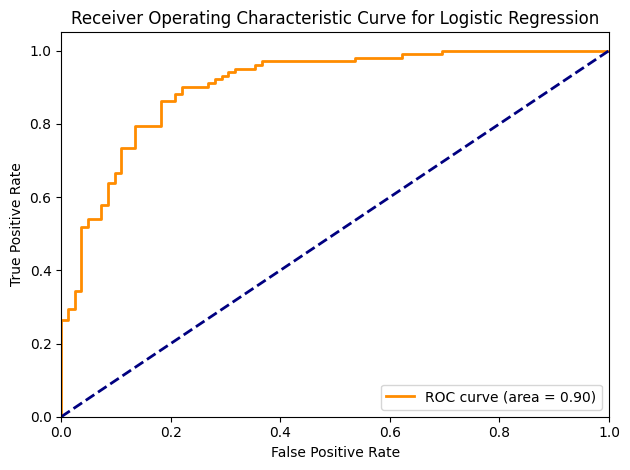

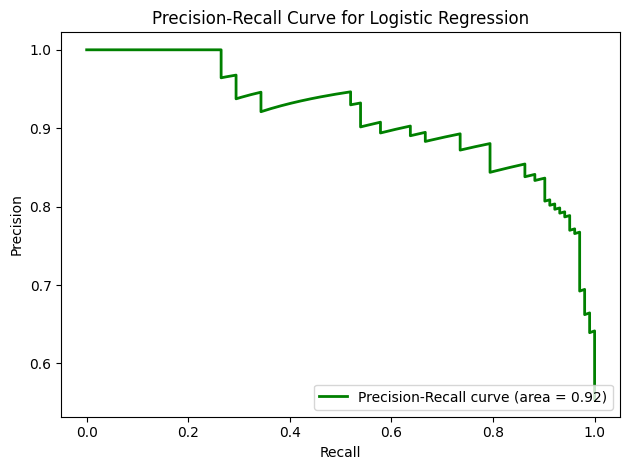

Index(['penalty', 'solver', 'f1 score', 'roc_auc', 'precision', 'recall',
       'average_precision'],
      dtype='object')
Best performing combination of penalty and solver values: penalty                                                             l1
solver                                                            saga
f1 score                                         (0.8241206030150754,)
roc_auc                                                        0.90483
precision            [0.5543478260869565, 0.5573770491803278, 0.560...
recall               [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
average_precision                                             0.916052
Name: 1, dtype: object
  penalty     solver               f1 score   roc_auc  \
0      l1  liblinear  (0.8241206030150754,)  0.904711   
1      l1       saga  (0.8241206030150754,)  0.904830   
2      l2  liblinear  (0.8241206030150754,)  0.904232   
3      l2       saga                (0.83,)  0.904352   

           

In [ ]:
# 7. Logistic Regression Model: 

# 7.1. Train the logistic regression model:
y1 = heart_data_cleaned_1['num']                                                   # The 'num' column is my target column
X1 = pd.get_dummies(heart_data_cleaned_1.drop(columns=['num']), dtype=int)         # One-hot encoding: converted floats to binary values (0 and 1). 
                                                                                   # Excluded the 'num' (for classification) column from the dataset.
                                                                                   # The 'chol' column has been included in the X1 parameter, along with the 
                                                                                   # rest of the columns, except for 'num' (target column)


X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=150, stratify=y1)  

# 7.2. Fill NaN values with the mean for all train and test sets: 

X1_train_cleaned = X1_train.fillna(X1_train.mean(numeric_only=True))              # I initially saw NaN values for both X1 and y1; hence, I used fillna and their respective means
X1_test_cleaned = X1_test.fillna(X1_train.mean(numeric_only=True))  
y1_train_cleaned = y1_train.fillna(y1_train.mean(numeric_only=True))
y1_test_cleaned = y1_test.fillna(y1_train.mean(numeric_only=True))

# 7.3. Standardization of the data: 

from sklearn.preprocessing import StandardScaler                                  # For standardizing the data 
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train_cleaned)
X1_test_scaled = scaler.transform(X1_test_cleaned)

# 7.4. Train the logistic regression model: 

penalties = ["l1", "l2"]                                                          # Lasso and Ridge regression penalties. 
solvers = ["liblinear", "saga"]                                                   # Libliear and saga solvers for logistic regression. Aligns with both l1 and l2. 
logist_regr_results = []                                                          # Empty list creation for logistic regression results. 

for penalty in penalties:                                                         # 2 x 2 = 4 possible penalty-solver combinations.
    for solver in solvers: 
        if penalty == "l1" and solver == "liblinear":
            log_regr = LogisticRegression(penalty=penalty, solver=solver, random_state=150)
            log_regr.fit(X1_train_scaled, y1_train_cleaned)
            y1_scores = log_regr.predict_proba(X1_test_scaled)[:, 1] 
            fpr, tpr, _ = roc_curve(y1_test_cleaned, y1_scores)
            roc_auc = auc(fpr, tpr)
            f1_score_result = f1_score(y1_test_cleaned, log_regr.predict(X1_test_scaled)),
            precision, recall, _ = precision_recall_curve(y1_test_cleaned, y1_scores)
            average_precision = average_precision_score(y1_test_cleaned, y1_scores)
            logist_regr_results.append({
                "penalty": penalty, 
                "solver": solver, 
                "f1 score": f1_score_result,
                "roc_auc": roc_auc, 
                "precision": precision,
                "recall": recall,
                "average_precision": average_precision
            }) 
            
        elif penalty == "l2" and solver == "saga":
            log_regr = LogisticRegression(penalty=penalty, solver=solver, random_state=150)
            log_regr.fit(X1_train_scaled, y1_train_cleaned)
            y1_scores = log_regr.predict_proba(X1_test_scaled)[:, 1] 
            fpr, tpr, _ = roc_curve(y1_test_cleaned, y1_scores)
            roc_auc = auc(fpr, tpr)
            f1_score_result = f1_score(y1_test_cleaned, log_regr.predict(X1_test_scaled)),
            precision, recall, _ = precision_recall_curve(y1_test_cleaned, y1_scores)
            average_precision = average_precision_score(y1_test_cleaned, y1_scores)
            logist_regr_results.append({
                "penalty": penalty, 
                "solver": solver, 
                "f1 score": f1_score_result,
                "roc_auc": roc_auc, 
                "precision": precision,
                "recall": recall,
                "average_precision": average_precision
            })
        elif penalty == "l1" and solver == "saga":
            log_regr = LogisticRegression(penalty=penalty, solver=solver, random_state=150)
            log_regr.fit(X1_train_scaled, y1_train_cleaned)
            y1_scores = log_regr.predict_proba(X1_test_scaled)[:, 1] 
            fpr, tpr, _ = roc_curve(y1_test_cleaned, y1_scores)
            roc_auc = auc(fpr, tpr)
            f1_score_result = f1_score(y1_test_cleaned, log_regr.predict(X1_test_scaled)),
            precision, recall, _ = precision_recall_curve(y1_test_cleaned, y1_scores)
            average_precision = average_precision_score(y1_test_cleaned, y1_scores)
            logist_regr_results.append({
                "penalty": penalty, 
                "solver": solver, 
                "f1 score": f1_score_result,
                "roc_auc": roc_auc, 
                "precision": precision,
                "recall": recall,
                "average_precision": average_precision
            })
        elif penalty == "l2" and solver == "liblinear":
            log_regr = LogisticRegression(penalty=penalty, solver=solver, random_state=150)
            log_regr.fit(X1_train_scaled, y1_train_cleaned)
            y1_scores = log_regr.predict_proba(X1_test_scaled)[:, 1] 
            fpr, tpr, _ = roc_curve(y1_test_cleaned, y1_scores)
            roc_auc = auc(fpr, tpr)
            f1_score_result = f1_score(y1_test_cleaned, log_regr.predict(X1_test_scaled)),
            precision, recall, _ = precision_recall_curve(y1_test_cleaned, y1_scores)
            average_precision = average_precision_score(y1_test_cleaned, y1_scores)
            logist_regr_results.append({
                "penalty": penalty, 
                "solver": solver, 
                "f1 score": f1_score_result,
                "roc_auc": roc_auc, 
                "precision": precision,
                "recall": recall,
                "average_precision": average_precision
            })
        else:
            print("Penalty and solver combination could not be implemented.")
            
logist_regr_results = pd.DataFrame(logist_regr_results)                                    # DataFrame creation for plotting the regression results (AUROC and AUPRC curves). 

# 7.5. AUROC Curve: 
plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Curve for Logistic Regression")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# 7.6. AUPRC Curve: 
plt.figure()
plt.plot(recall, precision, color="green", lw=2, label='Precision-Recall curve (area = %0.2f)' % average_precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Logistic Regression")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# 7.7. All combinations of penalty and solver values with their respective metrics (including the best performing combination):
print(logist_regr_results.columns)                                                                               # To check the column names in the newly generated DataFrame. 
                                                                                                                 # "roc_auc" was used for sorting.
best_comb = logist_regr_results.sort_values(by="roc_auc", ascending=False).iloc[0]                               # Interested in the top-most row after sorting. 
print("Best performing combination of penalty and solver values:" , best_comb)
print(logist_regr_results)


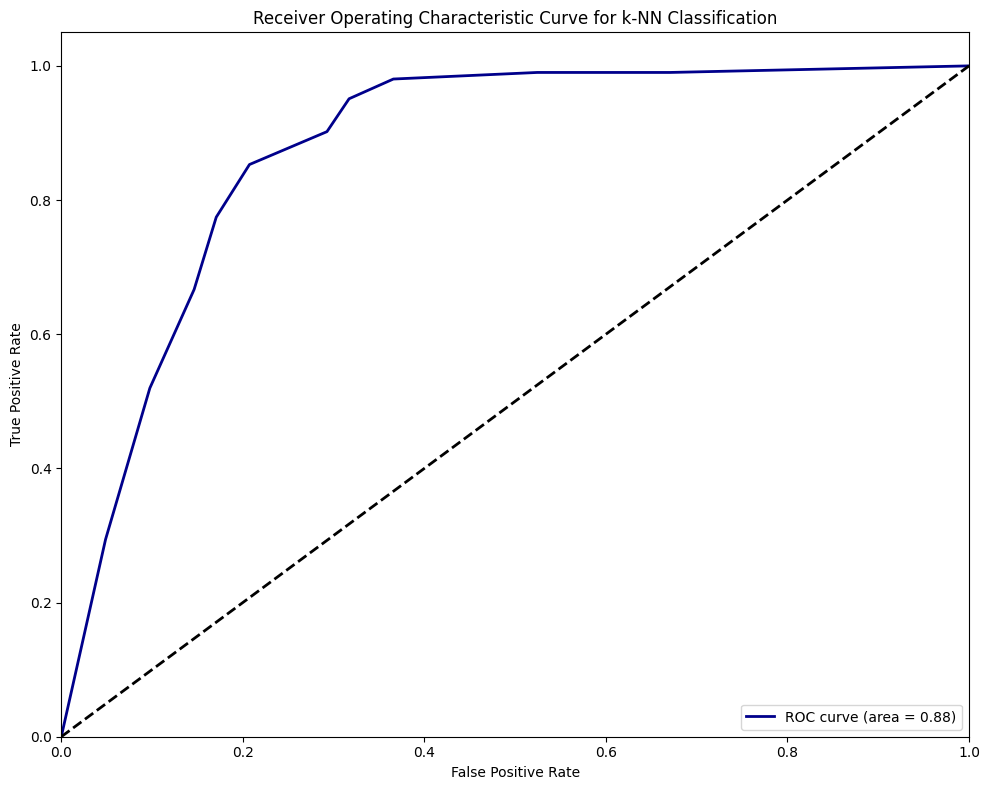

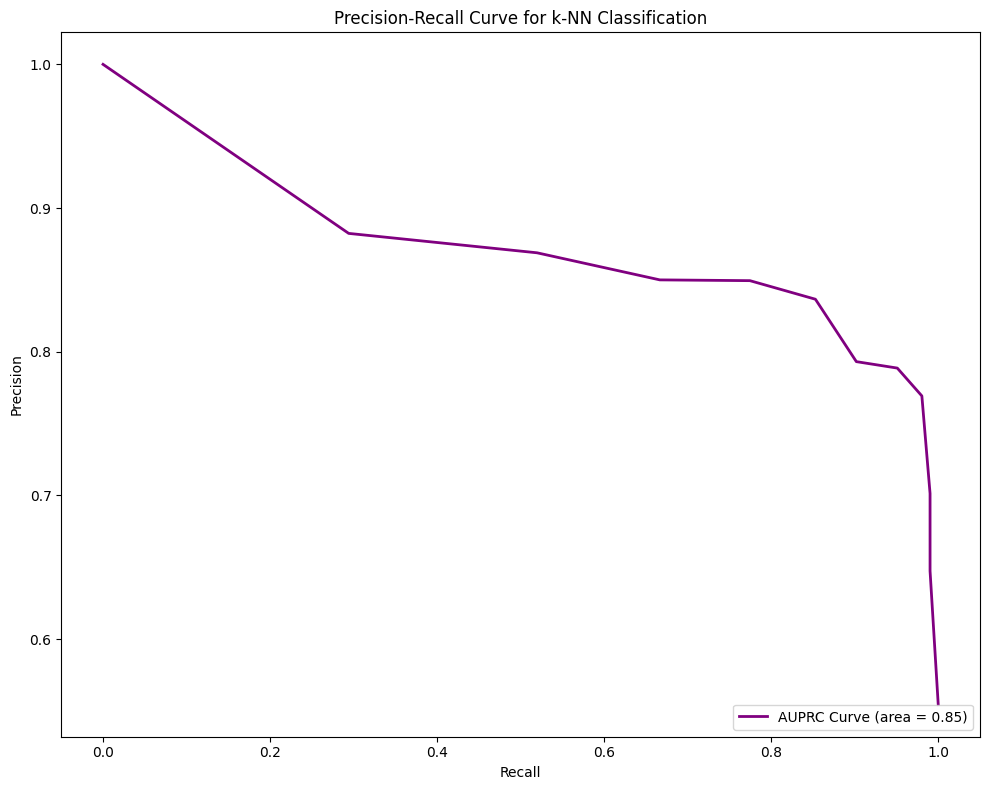

Index(['a', 'F1-Score', 'AUROC', 'AUPRC'], dtype='object')
Best performing k-NN value combination: a           10.000000
F1-Score     0.844660
AUROC        0.876674
AUPRC        0.836538
Name: 2, dtype: float64
    a  F1-Score     AUROC     AUPRC
0   1  0.786070  0.765304  0.797980
1   5  0.858491  0.864598  0.827273
2  10  0.844660  0.876674  0.836538


In [ ]:
# 8. k-NN Classification Model:

from sklearn.metrics import f1_score, roc_curve, auc, precision_recall_curve, precision_score, recall_score  # I had to rerun the package since I was getting errors. 

a_values = [1, 5, 10]                                                                               # Tuned-in hyperparameters for the k-NN classifier 
knn_values_final = []

for a in a_values: 
    knn = KNeighborsClassifier(n_neighbors=a)                                            
    knn.fit(X1_train_scaled, y1_train_cleaned) 
    y1_scores_knn_prob = knn.predict_proba(X1_test_scaled)[:, 1]
    fpr_knn, tpr_knn, _ = roc_curve(y1_test_cleaned, y1_scores_knn_prob)                            # Third value is ignored: _
    precision_knn, recall_knn, _ = precision_recall_curve(y1_test_cleaned, y1_scores_knn_prob) 
    average_precision_knn = average_precision_score(y1_test_cleaned, y1_scores_knn_prob)
    y1_pred_knn = knn.predict(X1_test_scaled)
    roc_auc_knn = auc(fpr_knn, tpr_knn)
    knn_values_final.append({"a": a, 
                             "F1-Score": f1_score(y1_test_cleaned, y1_pred_knn),
                             "AUROC": roc_auc_knn, 
                            "AUPRC": precision_score(y1_test_cleaned, y1_pred_knn)
                            })
    
knn_values_final = pd.DataFrame(knn_values_final)                                                   # DataFrame creation for plotting the k-NN results (AUROC and AUPRC curves). 
   
# 8.1. AUROC and AUPRC Curves for k-NN Classification: 

plt.figure(figsize=(10, 8))
plt.plot(fpr_knn, tpr_knn, color="darkblue", lw=2, label= "ROC curve (area = %0.2f)" % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Curve for k-NN Classification")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
plt.plot(recall_knn, precision_knn, color='purple', lw=2, label="AUPRC Curve (area = %0.2f)" % average_precision_knn)  
plt.xlabel("Recall")
plt.ylabel("Precision") 
plt.title("Precision-Recall Curve for k-NN Classification")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# 8.2. All combinations of k-NN values with their respective metrics (including the best performing combination):
print(knn_values_final.columns)                                                                                  # To check the column names in the newly generated DataFrame. 
                                                                                                                 # "AUROC" was used for sorting.
best_knn_comb = knn_values_final.sort_values(by="AUROC", ascending=False).iloc[0]                                # Interested in the top-most row after sorting.
print("Best performing k-NN value combination:", best_knn_comb)
print(knn_values_final)